# 第8章 : 行列形式のマトリックスプロットと全般の詳細な表示設定

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Category型について

In [8]:
# speciesのobject型をcategory型に変換
df['species'].astype('category')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [9]:
# Categoricalでも変更可能
pd.Categorical(df['species'])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [10]:
# Categoryに順序を付ける
pd.Categorical(df['species'], ordered=True, categories=['versicolor', 'virginica', 'setosa'])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['versicolor' < 'virginica' < 'setosa']

In [11]:
df['cat'] = pd.Categorical(df['species'], ordered=True, categories=['versicolor', 'virginica', 'setosa'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cat
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa


In [12]:
df['cat'].cat.categories

Index(['versicolor', 'virginica', 'setosa'], dtype='object')

In [13]:
df['cat'].cat.codes # 順序の確認

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int8

In [14]:
df.drop('cat', axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Numpyのwhere, selectを用いたレコード抽出と置換

In [15]:
np.where(df['petal_width'] > 1.3) # 条件を満たすindexを取得

(array([ 50,  51,  52,  54,  56,  59,  61,  63,  65,  66,  68,  70,  72,
         75,  76,  77,  78,  83,  84,  85,  86,  91, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149]),)

In [16]:
df[df['petal_width'] > 1.3].index # これと同じ

Index([ 50,  51,  52,  54,  56,  59,  61,  63,  65,  66,  68,  70,  72,  75,
        76,  77,  78,  83,  84,  85,  86,  91, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149],
      dtype='int64')

In [17]:
# Trueの場合, Falseの場合に格納する文字列を指定できる
np.where(df['petal_width'] > 1.3, 'wide', 'narrow') # Trueならwide, Falseならnarrow

array(['narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'wide', 'wide', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'narrow', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'wide', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'wide', 'narrow', 'narrow', 'wide',
       'wide', 'wide', 'wide', 'narrow', 'narrow', 'narrow', 'narrow',
       'wide', 'wide', 'wide', 'wide', 'narrow', 'narrow', 'narrow',
       'narrow', 'wide', 'narrow', 'narrow',

In [18]:
['wide' if df.loc[i, 'petal_width'] > 1.3 else 'narrow' for i in df.index] # 一応これと同じ

['narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'wide',
 'wide',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'wide',
 'narrow',
 'narrow',
 'wide',
 'wide',
 'wide',
 'wide',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'wide',
 'wide',
 'wide',
 'wide',
 'narrow',
 'narrow',
 'narrow',
 'narrow',
 'wide',
 'narrow',
 'narrow',
 'narrow',

In [19]:
# np.whereと異なりnp.selectでは複数の条件式を使える
conditions = [df['petal_width'] < 1,
              (1 < df['petal_width']) & (df['petal_width'] < 2),
              2 < df['petal_width']]
values = ['narrow', 'medium', 'wide']

In [20]:
np.select(conditions, values)

TypeError: Choicelist and default value do not have a common dtype: The DType <class 'numpy.dtypes._PyLongDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyLongDType'>)

In [ ]:
df['pw_cat'] = np.select(conditions, values)
df.head(3)

TypeError: Choicelist and default value do not have a common dtype: The DType <class 'numpy.dtypes._PyLongDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyLongDType'>)

In [21]:
np.random.seed(17)
arr = ['red', 'green', 'blue']
df['color'] = np.random.choice(arr, len(df))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,color
0,5.1,3.5,1.4,0.2,setosa,green
1,4.9,3.0,1.4,0.2,setosa,blue
2,4.7,3.2,1.3,0.2,setosa,blue
3,4.6,3.1,1.5,0.2,setosa,green
4,5.0,3.6,1.4,0.2,setosa,red


## Matrix Plot

In [22]:
# Seabornテーマの設定
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

### ヒートマップ

In [26]:
df_corr = df.corr(numeric_only=True) # 相関関係の確認
df_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


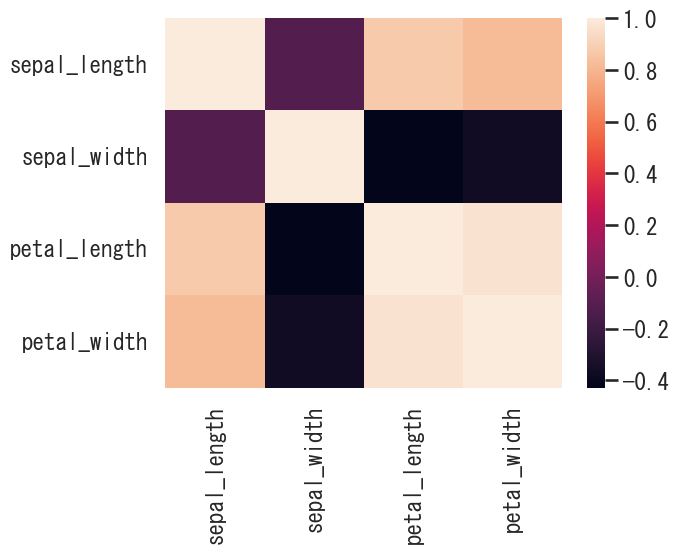

In [28]:
# ヒートマップ
sns.heatmap(data=df_corr)
plt.show()

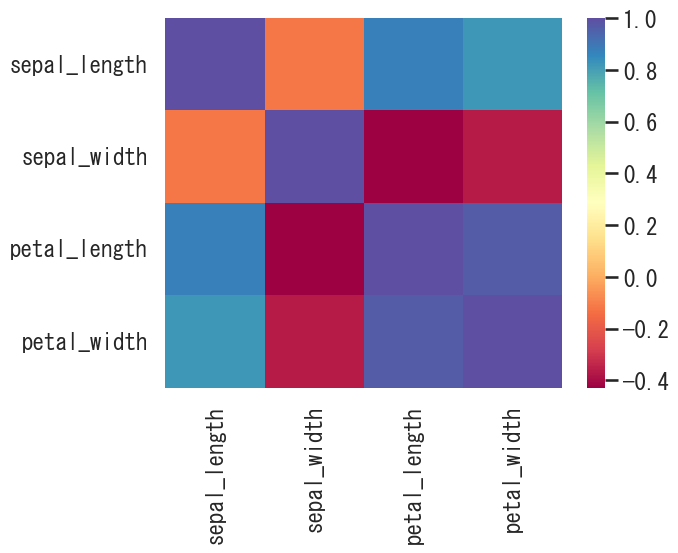

In [29]:
# ヒートマップでの色の変更はcmap
sns.heatmap(data=df_corr, cmap='Spectral')
plt.show()

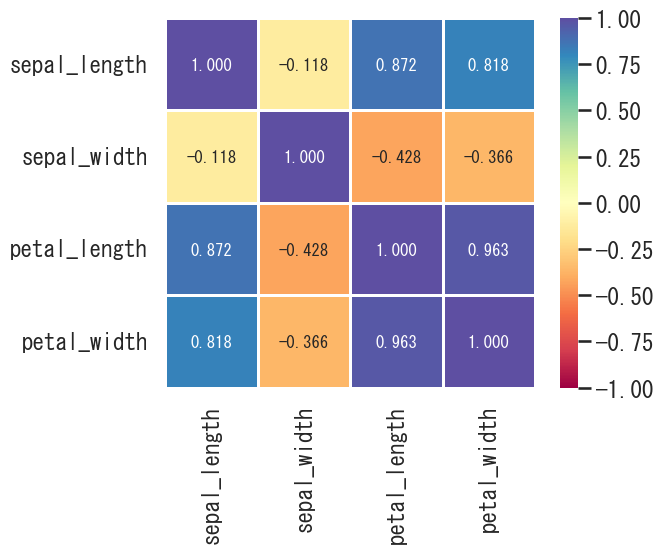

In [36]:
# いろいろ設定
sns.heatmap(data=df_corr, annot=True, annot_kws={'size':12}, fmt='.3f', cmap='Spectral',
    vmin=-1, square=True, linewidth=1)
plt.show()

### クラスターマップ

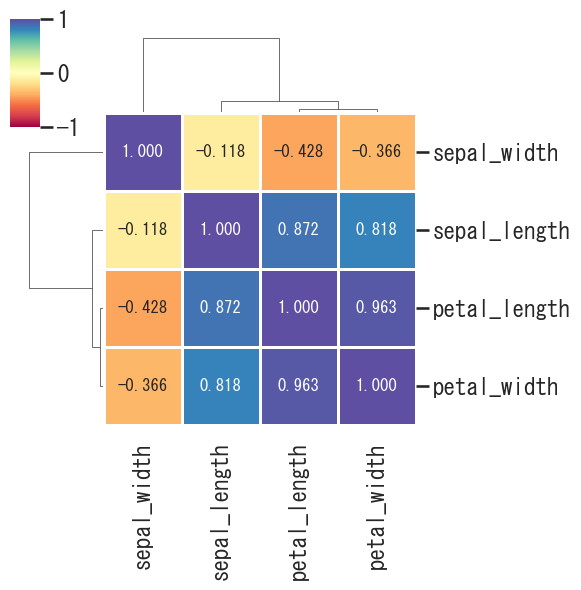

In [38]:
# クラスターマップ
sns.clustermap(data=df_corr, annot=True, annot_kws={'size':12}, fmt='.3f', cmap='Spectral',
    vmin=-1, linewidth=1, figsize=(6,6))
plt.show()

### ペアグリッド

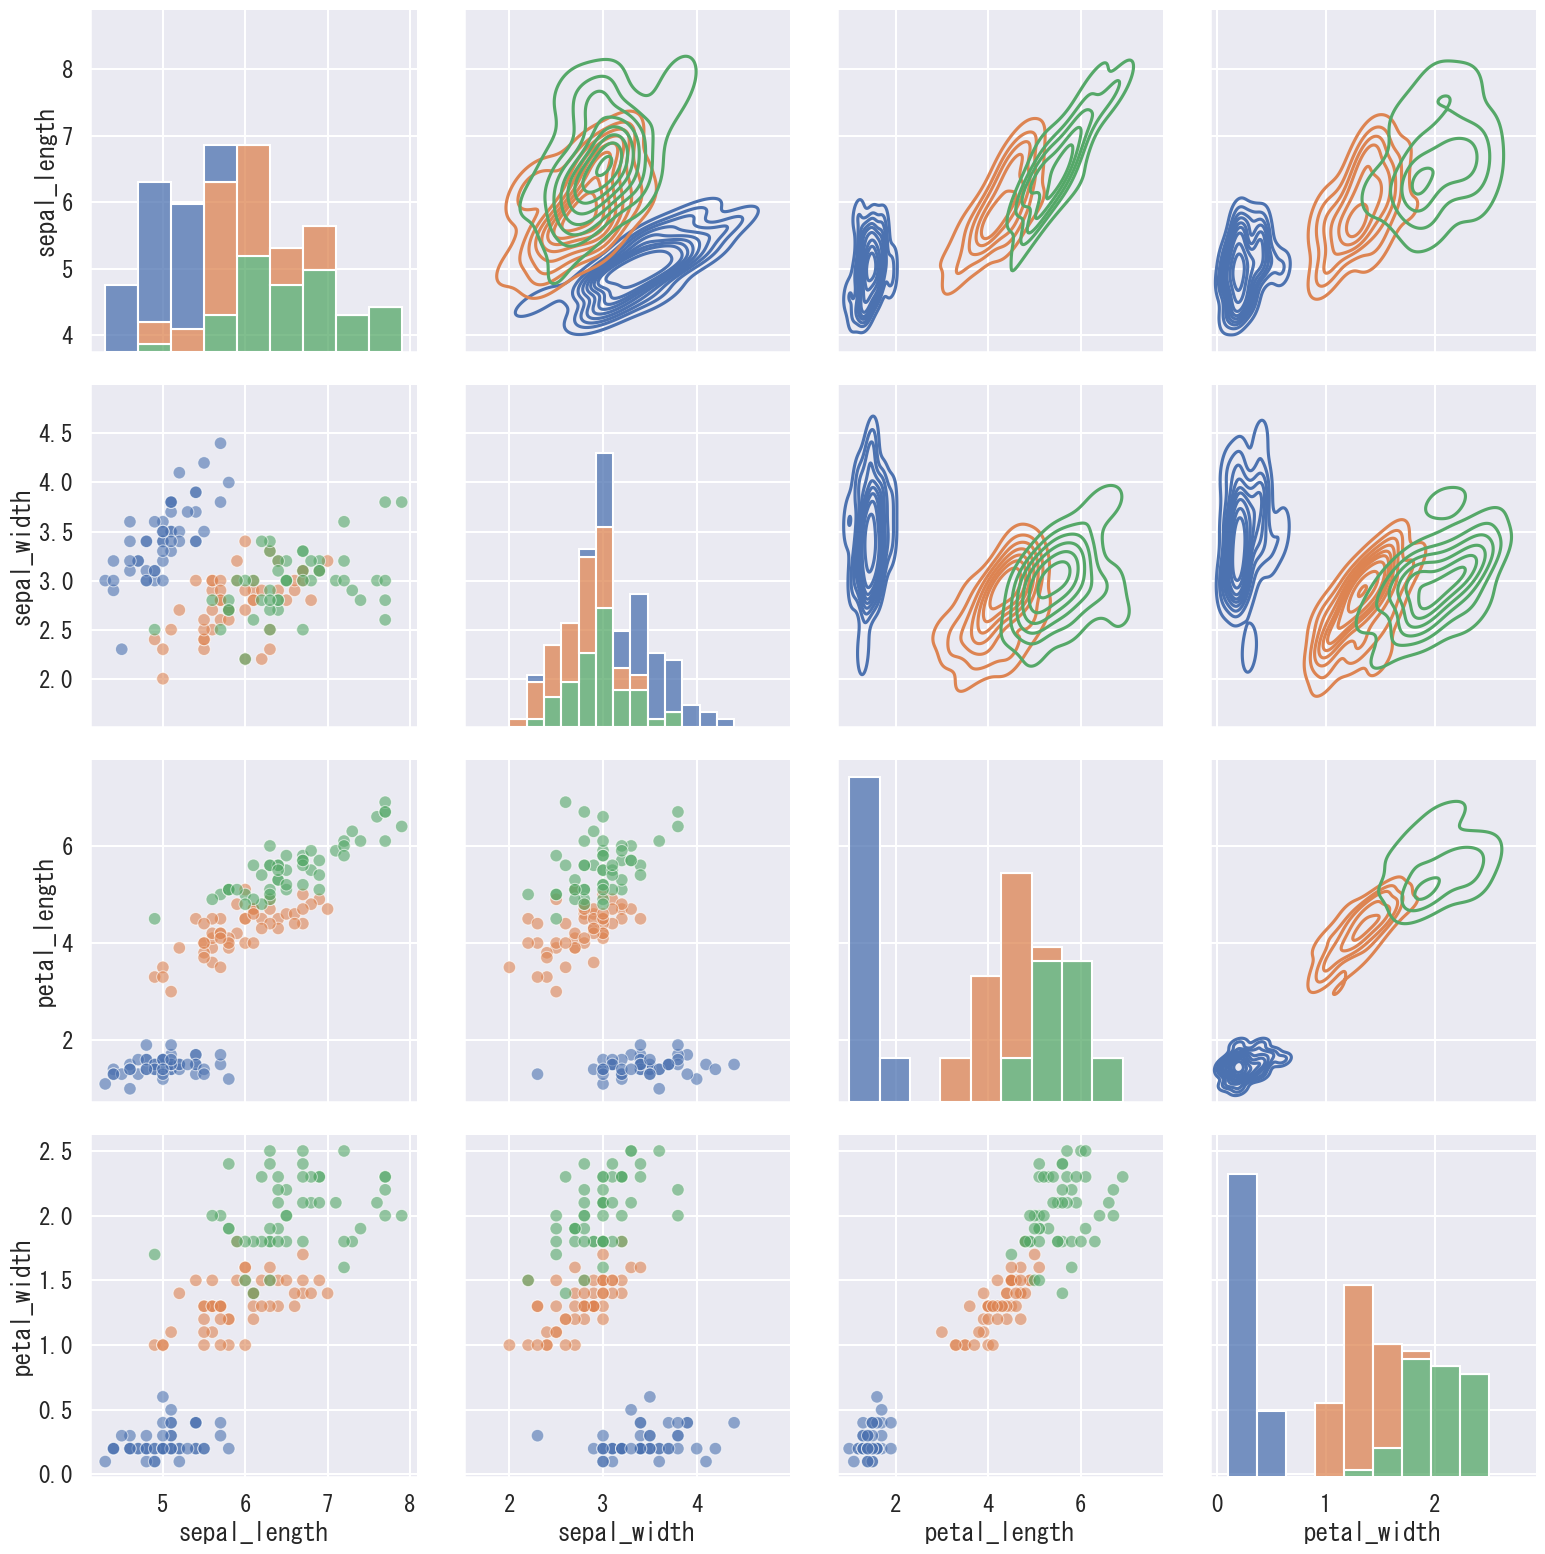

In [42]:
# ペアグリッド
g = sns.PairGrid(data=df, hue='species', vars=df.select_dtypes(float).columns, height=4)
g.map_diag(sns.histplot, multiple='stack') # 対角線上のプロット
g.map_upper(sns.kdeplot) # 対角線より上側のプロット
g.map_lower(sns.scatterplot, alpha=0.6) # 対角線より下側のプロット
plt.show()

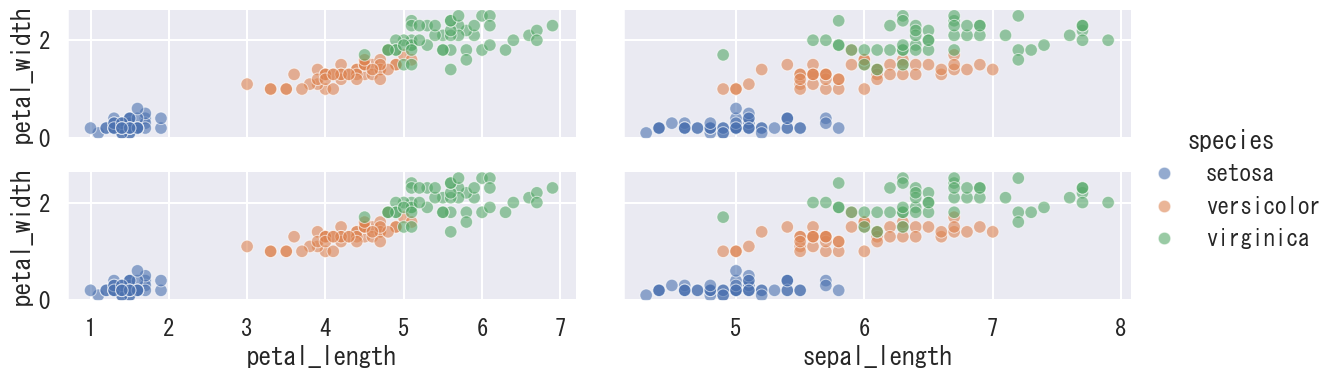

In [45]:
# PairGridでは特徴量の組み合わせを選択できる
length = ['petal_length', 'sepal_length']
width = ['petal_width', 'petal_width']
g = sns.PairGrid(data=df, hue='species', x_vars=length, y_vars=width, height=2, aspect=3)
g.map(sns.scatterplot, alpha=0.6)
g.add_legend()
plt.show()

### Facetグリッド

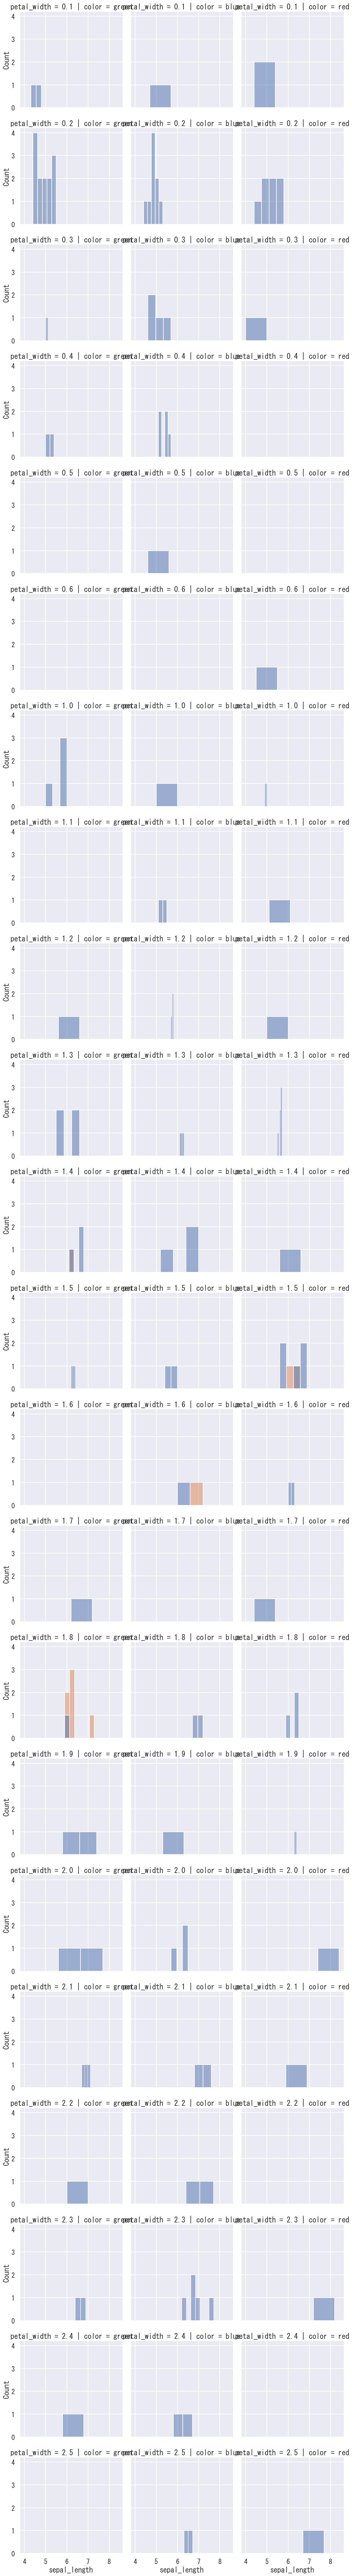

In [47]:
g = sns.FacetGrid(data=df, row='petal_width', col='color', height=4)
g.map_dataframe(sns.histplot, x='sepal_length', hue='species')
g.add_legend()
plt.show()

## パイチャート

In [49]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [50]:
data = df['species'].value_counts()
labels = data.index
labels

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')

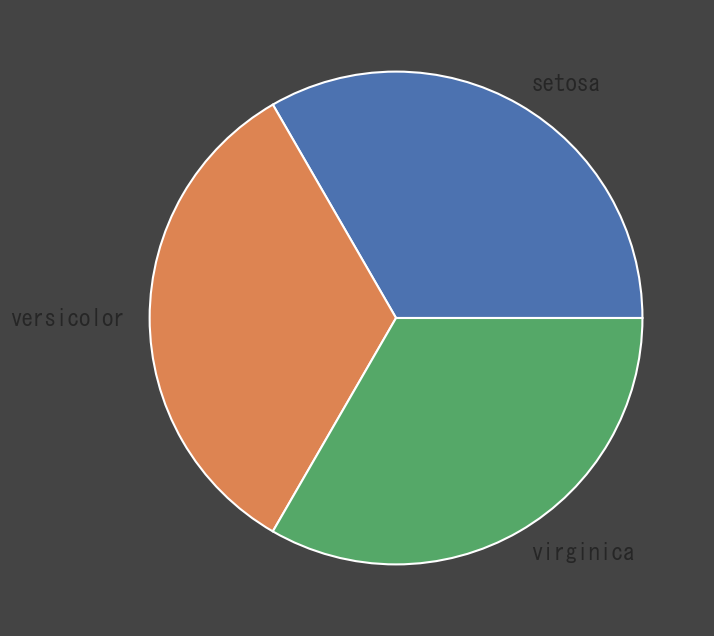

In [51]:
# パイチャート
plt.figure(figsize=(10, 8), facecolor='#444')
plt.pie(data, labels=labels)
plt.show()

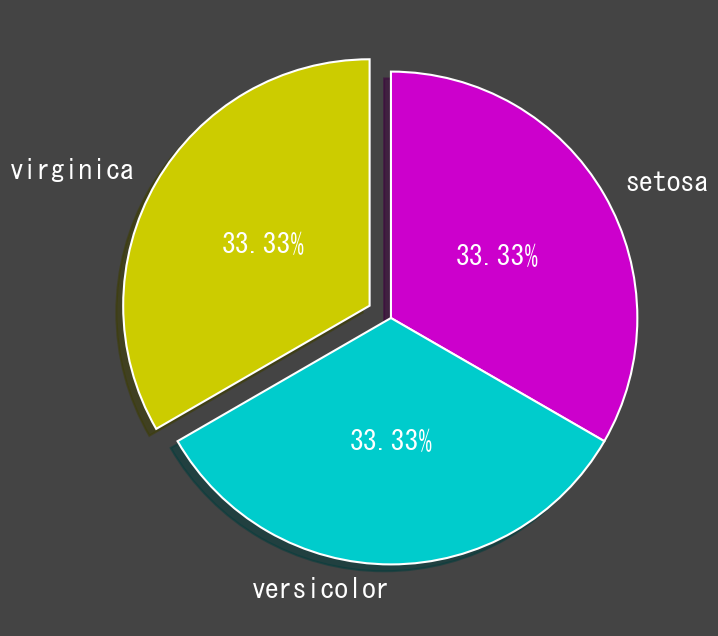

In [60]:
plt.figure(figsize=(10, 8), facecolor='#444')
plt.pie(data, labels=labels, autopct='%.2f%%', textprops={'color':'#fff', 'size':20},
    colors=['#c0c', '#0cc', '#cc0'], startangle=90, counterclock=False,
    explode=[0, 0, 0.1], shadow=True, pctdistance=0.5)
plt.show()

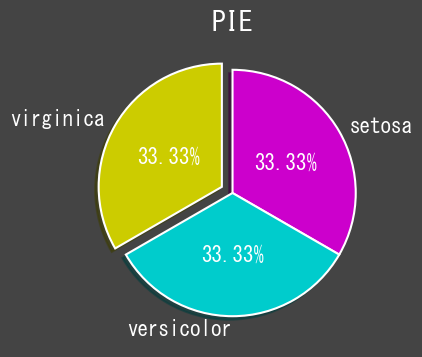

In [65]:
plt.figure(figsize=(6, 4), facecolor='#444')
plt.pie(data, labels=labels, autopct='%.2f%%', textprops={'color':'#fff', 'size':15},
    colors=['#c0c', '#0cc', '#cc0'], startangle=90, counterclock=False,
    explode=[0, 0, 0.1], shadow=True, pctdistance=0.5)
plt.title('PIE', size=20, color='#fff')
# 画像の保存
plt.savefig('pie.png', dpi=100) # dpi:dots per inch

plt.show()

## Figure全体の表示をより詳細に設定する方法

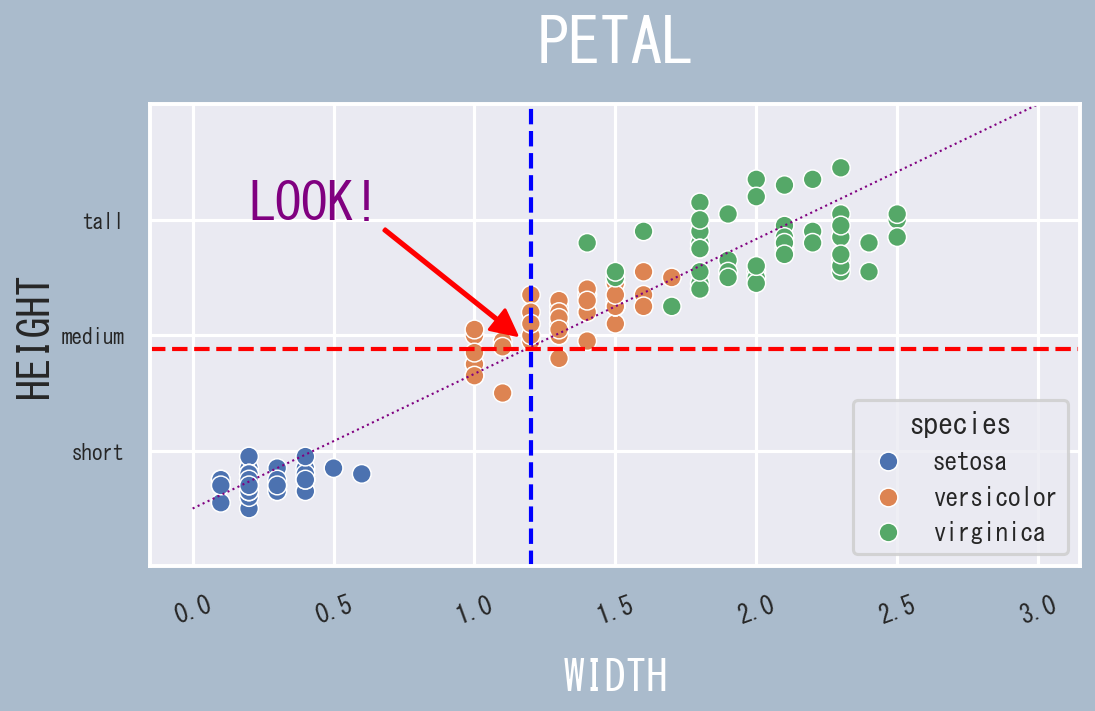

In [86]:
# グラフの表示設定
plt.figure(figsize=(8, 4), facecolor='#abc', dpi=150)
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species')
plt.title('PETAL', fontsize=30, color='#fff', pad=20)
plt.xlabel('WIDTH', fontsize=20, color='#fff', labelpad=15)
plt.ylabel('HEIGHT', fontsize=20)

plt.yticks([2, 4, 6], ['short', 'medium', 'tall'], size=10) # 目盛りの変更
plt.ylim(0, 8)

plt.xticks(rotation=20, size=12)

plt.legend(loc='lower right', title='species', fontsize=12, title_fontsize=14)

plt.plot([0, 3], [1, 8], color='purple', linewidth=1, linestyle=':')
plt.axhline(df['petal_length'].mean(), color='red', linewidth=2, linestyle='--') # x軸に平行な直線
plt.axvline(df['petal_width'].mean(), color='blue', linewidth=2, linestyle='--') # x軸に垂直な直線

plt.annotate('LOOK!', xy=(1.15, 4), xytext=(0.2, 6), color='purple', size=25,
    arrowprops={'color':'red', 'width':1}) # 矢印の表示

plt.show()

## オブジェクト指向形式の詳細表示の設定方法

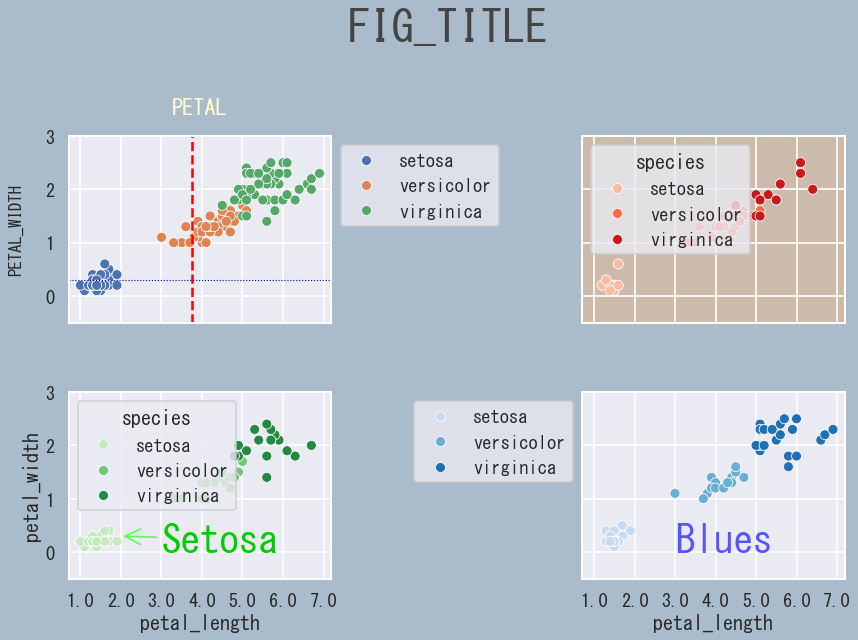

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), facecolor='#abc', dpi=80, tight_layout=True,
    sharey=True, sharex=True)

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species',
    ax=axes[0, 0])
sns.scatterplot(data=df[df['color'] == 'red'], x='petal_length', y='petal_width', hue='species',
    ax=axes[0, 1], palette='Reds')
sns.scatterplot(data=df[df['color'] == 'green'], x='petal_length', y='petal_width', hue='species',
    ax=axes[1, 0], palette='Greens')
sns.scatterplot(data=df[df['color'] == 'blue'], x='petal_length', y='petal_width', hue='species',
    ax=axes[1, 1], palette='Blues')

fig.suptitle('FIG_TITLE', size=40, color='#444', y=1.01)

# axesの間隔調整
fig.subplots_adjust(wspace=5, hspace=5)

# それぞれのaxesにタイトルをつける
axes[0, 0].set_title('PETAL', size=20, pad=20, color='#ffc')

axes[0, 0].set_ylabel('PETAL_WIDTH', labelpad=20, fontsize=15)

axes[0, 0].set_ylim(-0.5, 3)

axes[0, 0].set_xticks([1, 2, 3, 4, 5, 6, 7])
axes[0, 0].set_xticklabels([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])

axes[1, 1].text(3, 0, 'Blues', size=35, c='#55f')

# 矢印と文字列の追加
axes[1, 0].annotate('Setosa', xy=(2, 0.3), xytext=(3, 0), size=35, color='#0c0',
    arrowprops={'arrowstyle':'->', 'color':'#5f5'})

axes[0, 1].set_facecolor('#cba')

axes[0, 0].axvline(df['petal_length'].mean(), color='#f00', linestyle='--') # x軸に垂直な線
axes[0, 0].axhline(0.3, color='#00c', linestyle=':', linewidth=1) # x軸に平行な直線

# legendの位置調整
axes[0, 0].legend(bbox_to_anchor=(1, 1)) # これで外に出せる
axes[1, 1].legend(bbox_to_anchor=(0, 1))

plt.show()